### Introduction to SURF (Speeded-Up Robust Features)
SIFT is really good, but not fast enough, so people came up with a speeded-up version called SURF.

#### 목표
In this chapter,

* We will see the basics of SURF
* We will see SURF functionalities in OpenCV

#### 이론
마지막 장에서는 키 포인트 탐지 및 설명을 위해 SIFT를 보았습니다. 그러나 상대적으로 느리고 사람들은 더 빠른 버전이 필요했습니다. 2006 년 세 사람, 베이, H., Tuytelaars, T . Van Gool, L은 또 다른 논문 인 "SURF : SURF라는 새로운 알고리즘을 도입 한 강력한 기능 강화"를 발표했습니다. 이름에서 알 수 있듯이, 그것은 SIFT의 빠른 버전입니다.

SIFT에서 Lowe는 스케일 공간을 찾기 위해 Gaussian의 차이와 함께 Laplacian of Gaussian을 근사화했습니다. SURF는 조금 더 나아가 박스 필터로 LoG를 근사합니다. 아래 이미지는 그러한 근사값을 보여줍니다. 이 근사법의 한 가지 큰 이점은 적분 이미지를 사용하여 상자 필터를 사용한 회선을 쉽게 계산할 수 있다는 것입니다. 그리고 그것은 서로 다른 규모로 병렬 적으로 수행 될 수 있습니다. 또한 SURF는 스케일과 위치 모두에 대해 헤센 행렬의 행렬식에 의존합니다.

![](surf_boxfilter.jpg)

방향 지정의 경우 SURF는 크기가 6 인 인접에 대해 수평 및 수직 방향으로 웨이블릿 응답을 사용합니다. 적절한 가우시안 가중치도 적용됩니다. 그러면 아래 그림과 같이 공간에 그려집니다. 지배적 인 방향은 각도 60 °의 슬라이딩 방향 윈도우 내에서 모든 응답의 합을 계산하여 추정됩니다. 흥미로운 것은 웨이블릿 응답은 어떤 스케일에서도 매우 쉽게 적분 이미지를 사용하여 찾을 수 있다는 것입니다. 많은 응용 프로그램에서 회전 불변 값이 필요하지 않으므로이 방향을 찾을 필요가 없으므로 처리 속도가 빨라집니다. SURF는 Upright-SURF 또는 U-SURF와 같은 기능을 제공합니다. 그것은 속도를 향상시키고 까지 튼튼 합니다. OpenCV의 국기에 따라 모두 지원 직립\\(±15^∘\\). 값이 0이면 방향이 계산됩니다. 1이면 방향이 계산되지 않고 빠릅니다.

![](surf_orientation.jpg)

특징 설명을 위해 SURF는 수평 및 수직 방향으로 Wavelet 응답을 사용합니다 (다시 말하면, 통합 이미지를 사용하면 작업이 더 쉬워집니다). 20sX20s 크기의 이웃은 s가 크기 인 키포인트를 중심으로 촬영됩니다. 그것은 4x4 subregions로 나뉘어집니다. 각 소구역에 대해 수평 및 수직 웨이브 렛 응답이 취해지고 벡터는 다음과 같이 형성된다. \\(v=( \sum{d_x}, \sum{d_y}, \sum{|d_x|}, \sum{|d_y|})\\). 이것은 벡터로 표현 될 때 총 64 차원의 SURF 피처 설명자를 제공합니다. 차원을 낮추고 계산 속도와 일치 속도는 높아지지만 기능의 차별성을 향상시킵니다.  


보다 차별화 된 기능을 위해 SURF 피처 설명자는 확장 된 128 자 버전을가집니다. \\(d_x와 |d_x|의 합  d_y < 0 및 dd_y \geq 0\\)에 대해 별도로 계산됩니다. 유사하게, \\(d_y와 |d_y|은 d_x\\)의 부호에 따라 분할되어 피쳐의 수를 두 배로 늘립니다. 그것은 많은 계산 복잡성을 추가하지 않습니다. OpenCV는 각각 64-dim과 128-dimm에 대해 0과 1로 확장 된 플래그 값을 설정하여 둘 다 지원합니다 (기본값은 128-dim입니다)

또 다른 중요한 개선점은 기본 관심 지점에 Laplacian (헤시안 행렬의 흔적) 표지판을 사용하는 것입니다. 그것은 이미 탐지 중에 계산되기 때문에 계산 비용을 추가하지 않습니다. 라플라시안 (Laplacian)의 표지판은 어두운 배경의 밝은 얼룩을 반대의 상황과 구별합니다. 매칭 단계에서, 우리는 같은 유형의 콘트라스트 (아래 그림 참조)가있는 경우에만 피쳐를 비교합니다. 이 최소한의 정보만으로도 설명 자의 성능을 저하시키지 않고도 더 빨리 일치시킬 수 있습니다.

![](surf_matching.jpg)

즉, SURF는 모든 단계에서 속도를 향상시키는 많은 기능을 추가합니다. 분석 결과 SIFT보다 3 배 빠르고 성능은 SIFT와 비슷합니다. SURF는 블러 링 및 회전이있는 이미지를 처리 ​​할 때 좋지만 뷰 포인트 변경 및 조명 변경을 처리하지는 않습니다.

#### SURF in OpenCV
OpenCV는 SIFT와 같은 SURF 기능을 제공합니다. 64 / 128-dim 설명자, Upright / Normal SURF 등의 선택적 조건을 사용하여 SURF 객체를 초기화합니다. 모든 세부 사항은 문서에서 자세히 설명합니다. SIFT에서했던 것처럼, 우리는 키포인트와 디스크립터를 찾기 위해 SURF.detect(), SURF.compute() 등을 사용할 수 있습니다.

먼저 SURF 키포인트와 디스크립터를 찾고 그리는 방법에 대한 간단한 데모를 볼 것입니다. 모든 예제는 SIFT와 동일하기 때문에 파이썬 터미널에 표시됩니다

In [9]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import bonghanUtil as util

img  = cv.imread('fly.jpg', 0)

# Create SURF object. You can specify params here or later.
# Here I set Hessian Threshold to 400
surf    = cv.xfeatures2d.SURF_create(400)
kp, des = surf.detectAndCompute(img, None)

print(len(kp))

1330


1199 키포인트가 너무 많아서 그림에 표시 할 수 없습니다. 그것을 이미지 위에 그리기 위해 약 50 개로 줄입니다. 일치하는 동안 우리는 모든 기능을 필요로하지만 지금은 필요하지 않을 수 있습니다. 그래서 우리는 헤 시안 임계 값을 증가시킵니다.

In [10]:
# Check present Hessian threshold
print(surf.getHessianThreshold())

# We set it to some 50000. Remember, it is just for representing in picture.
# In actual cases, it is better to have a value 300-500
surf.setHessianThreshold(50000)

# Again compute keypoints and check its number.
kp, des = surf.detectAndCompute(img, None)

print(len(kp))


400.0
48


그것은 50 이하입니다. 이미지 위에 그려 보겠습니다.

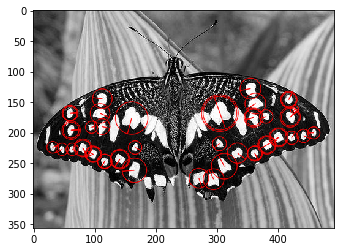

(<matplotlib.image.AxesImage at 0x1a85eb27588>, None)

In [11]:
img2 = cv.drawKeypoints(img, kp, None, (255, 0, 0), 4)

plt.imshow(img2), plt.show()

위 결과를 보십시오. SURF가 얼룩 검출기와 더 흡사하다는 것을 알 수 있습니다. 그것은 나비의 날개에 흰 얼룩을 감지합니다. 다른 이미지로 테스트 할 수 있습니다.

Now I want to apply U-SURF, so that it won't find the orientation.

128


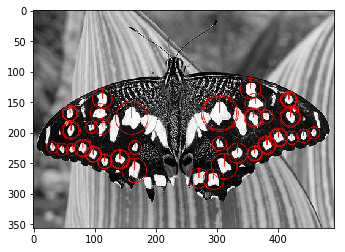

True
128
(48, 128)


In [17]:
# Find size of descriptor
print(surf.descriptorSize())

surf.setUpright(True)

# Recompute the feature points and draw it
kp   = surf.detect(img, None)
img2 = cv.drawKeypoints(img, kp, None, (255, 0, 0), 4)

plt.imshow(img2), plt.show()

위 결과를 보십시오. 모든 방향은 같은 방향으로 표시됩니다. 이전보다 빠릅니다. 방향이 문제가되지 않는 경우 (예 : 파노라마 스티칭) 등의 작업을하는 경우이 방법을 사용하는 것이 좋습니다.

마침내 우리는 디스크립터 크기를 확인하고 그것이 단지 64-dim 경우 128로 변경한다.

In [ ]:
# That means flag, "extended" is False
print(surf.getExtended())

# So we make it to True to get 128-dim descriptors.
surf.setExtended(True)
kp, des = surf.detectAndCompute(img, None)
print(surf.descriptorSize())
print(des.shape)

Remaining part is matching which we will do in another chapter.

#### Additional Resources
#### Exercises